*Import library's*

In [26]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import tweepy
from os import path
from textblob import TextBlob as tb
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt
import sys
from importlib import reload
import imp
from textblob.classifiers import NaiveBayesClassifier
import os
import re
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
from html.parser import HTMLParser
from bs4 import BeautifulSoup

*Twitter authentication*

In [27]:
consumer_key = 'Jg95VukOglg6RIqRrqt6GYRoa'
consumer_secret = 'ZvH3Oz7jFN0OvDMXGtRriTqOOykGnUgqxAU0wNKWhMElII0ivq'
access_token = '971179238396227584-KkOSGzCwhzv0lokz55Dkp1wTjyurnkW'
access_token_secret = 'y2NNUWU1tlhQYMOps49aSKgckRqTu7T7dPWpyNbMeXvAA'

*Twitter API Login*

In [28]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    alltweets = []
    new_tweets = api.search(screen_name)
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    while len(new_tweets) > 0:
        new_tweets = api.search(screen_name,count=200,max_id=oldest)
        alltweets.extend(new_tweets)
        oldest = alltweets[-1].id - 1
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    return outtweets

*Get all tweets*

In [42]:
public_tweets = get_all_tweets('@falanext')
df = pd.DataFrame(public_tweets, columns=['id','created_at','text'])
df

,id,created_at,text
0,1058490294780526598,2018-11-02 22:45:26,b'@falanext exausta de tentar anexar a minha d...
1,1058487971010277377,2018-11-02 22:36:12,b'@falanext Tudo bem ent\xc3\xa3o ficarei liga...
2,1058473562850447360,2018-11-02 21:38:57,b'@falanext Eu n\xc3\xa3o uso o cart\xc3\xa3o ...
3,1058446325212213249,2018-11-02 19:50:43,b'Se o @falanext n\xc3\xa3o me der limite inic...
4,1058435045256507394,2018-11-02 19:05:54,"b'@falanext Chamei, n\xc3\xa3o obtive resposta'"
5,1058417939299360768,2018-11-02 17:57:55,b'Alo @falanext me aceita logo caralho'
6,1058403881154158594,2018-11-02 17:02:04,b'@falanext Seguros associados ao meu cart\xc3...
7,1058395614810124288,2018-11-02 16:29:13,b'@falanext Fui ao caixa e o cart\xc3\xa3o de ...
8,1058393584473440256,2018-11-02 16:21:09,"b'@falanext pessoal, eu amo vcs, mas to precis..."
9,1058392090034520064,2018-11-02 16:15:12,b'@falanext queria diminuir umas parcelas de u...


*Data Cleaning*

In [43]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessary white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:500]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [44]:
data = pd.DataFrame(test_result, columns=['tweet_text'])
data

,tweet_text
0,exausta de tentar anexar a minha declara o de ...
1,
2,eu n o uso o cart o next com outro objetivo a ...
3,se o n o me der limite inicial de k vou ficar ...
4,chamei n o obtive resposta
5,alo me aceita logo caralho
6,seguros associados ao meu cart o de cr dito
7,fui ao caixa e o cart o de cr dito estava libe...
8,pessoal eu amo vcs mas to precisando de uma aj...
9,queria diminuir umas parcelas de umas compras ...


*Stopwords in portuguese*

In [38]:
stopwords = nltk.corpus.stopwords.words('portuguese')

*Used words*

In [39]:
text = " ".join(tweet for tweet in data.tweet_text)

*WordCloud*

(-0.5, 399.5, 199.5, -0.5)

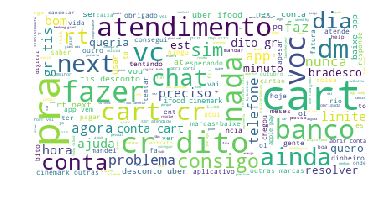

In [40]:
wordcloud = WordCloud(max_font_size=50,stopwords=stopwords,background_color='white').generate(text)
wordcloud.to_file("nouns_user.png")
plt.imshow(wordcloud)
plt.axis("off")

*Counting the words used in the WordCloud*

In [14]:
print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 5511 words in the combination of all tweets.


*ReLi Lexicon - portuguese sentimental analysis*

In [15]:
base_path = 'C:/Users/Gabriela/Documents/GitHub/tcc/ReLi-Lex'
train = []
files = [os.path.join(base_path, f) for f in os.listdir(base_path)]

*Read ReLi Lexicon file in directory*

In [16]:
for file in files:
    t = 'pos' if '_Positivos' in file else 'neg'
    with open(file, 'r') as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            train.append((w[1:-1], t))

cl = NaiveBayesClassifier(train)

*Tweets classification in positives and negatives*

In [17]:
dados = {}
for tweet in public_tweets:
    
    for s in blob.sentences:
        blob = tb(str(data.tweet_text), classifier=cl)
        print("[%s] %s" % (s.classify(), s))

NameError: name 'blob' is not defined

Print das informações em formato de dataframe

Consolidação ou contagem de positivos e negativos

Gráfico da análise de sentimentos, baseado na classificação de Naive-Bayes